In [3]:
#1 - importar as bibliotecas
#pandas -> vou transformar a tabela
import pandas as pd
#matplotlib -> para plotar o gráfico
import matplotlib.pyplot as plt

In [7]:
#2 -  Ler o arquivo .csv
df = pd.read_csv('IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [13]:
#3 - apresentar informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [163]:
print(df.shape[0])#verificar quantidade de linhas totais na tabela
df.isnull().sum()#verifica se tem linhas vazias e conta a quantidade
df.duplicated().sum() # somas as linhas duplicadas da tabela

8565


0

In [23]:
df.columns
df.columns = ['Região', 'Categoria', 'Parâmetro', 'Tipo','Trem de Força','Ano','Unidade','Valor']
df.columns

Index(['Região', 'Categoria', 'Parâmetro', 'Tipo', 'Trem de Força', 'Ano',
       'Unidade', 'Valor'],
      dtype='object')

In [157]:
#visualizar os valores numa coluna
df['Unidade'].unique()

array(['Vehicles', 'GWh', 'Milion barrels per day',
       'Oil displacement, million lge'], dtype=object)

In [139]:
#TRADANDO OS DADOS PARA TRABALAHAR COM ELES

#criando um dataframe para selecionar apenas veiculos
df_vehicles = df.loc[df['Unidade'] == 'Vehicles']




#excluindo valores

# Textos específicos para remover
textos_especificos = ['percent', 'charging points']

# padrão de expressão regular para os textos específicos
padrão = '|'.join(textos_especificos)
#percent = 'percent'
#charging_points = 'charging points'
df_filtrado = df[~df['Unidade'].str.contains(padrão, case=False, na=False)]
df_filtrado.head(80)
df = df_filtrado
df.info()
#df_filtrado = df[~df['Unidade'].str.contains(charging_points, case=False, na=False)]
#df_filtrado.head(80)

<class 'pandas.core.frame.DataFrame'>
Index: 8565 entries, 2 to 12635
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Região         8565 non-null   object 
 1   Categoria      8565 non-null   object 
 2   Parâmetro      8565 non-null   object 
 3   Tipo           8565 non-null   object 
 4   Trem de Força  8565 non-null   object 
 5   Ano            8565 non-null   int64  
 6   Unidade        8565 non-null   object 
 7   Valor          8565 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 602.2+ KB


In [145]:
#plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).
conta_tipo = df.groupby('Tipo')['Valor'].sum()
#conta_tipo = df['Tipo'].value_counts()
print (conta_tipo)

Tipo
Buses     6.746413e+07
Cars      4.708177e+09
Trucks    9.868970e+07
Vans      2.814518e+08
Name: Valor, dtype: float64


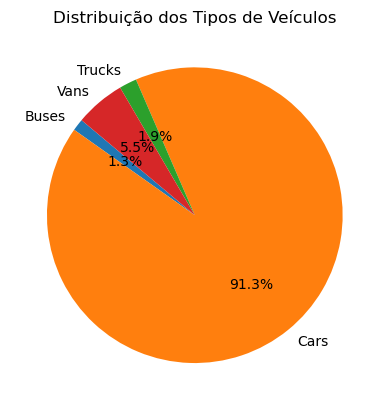

In [147]:
# gráfico de pizza
plt.pie(conta_tipo, labels=conta_tipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Veículos')
plt.show()

In [149]:
conta_reg = df['Região'].value_counts()
print (conta_reg)

Região
World                   970
Europe                  955
China                   871
Rest of the world       771
USA                     552
India                   501
EU27                    285
Netherlands             228
France                  222
United Kingdom          209
Denmark                 193
Germany                 192
Belgium                 188
Sweden                  163
Norway                  159
Switzerland             147
Japan                   144
Canada                  143
Spain                   143
Italy                   134
Korea                   121
Poland                  113
Finland                 112
New Zealand             111
Portugal                104
Brazil                  101
Israel                   80
Iceland                  70
Austria                  65
Australia                56
Chile                    51
South Africa             47
Mexico                   44
Turkiye                  41
Greece                   40
Costa Rica   

In [151]:
# número de veículos por região
df_conta = df.groupby('Região').size().reset_index(name='Quantidade')


df_ordena = df_conta.sort_values(by='Quantidade', ascending=False)

# 10 principais regiões
top_10 = df_ordena.head(10)
print (top_10)

               Região  Quantidade
51              World         970
16             Europe         955
7               China         871
38  Rest of the world         771
48                USA         552
23              India         501
14               EU27         285
33        Netherlands         228
18             France         222
50     United Kingdom         209


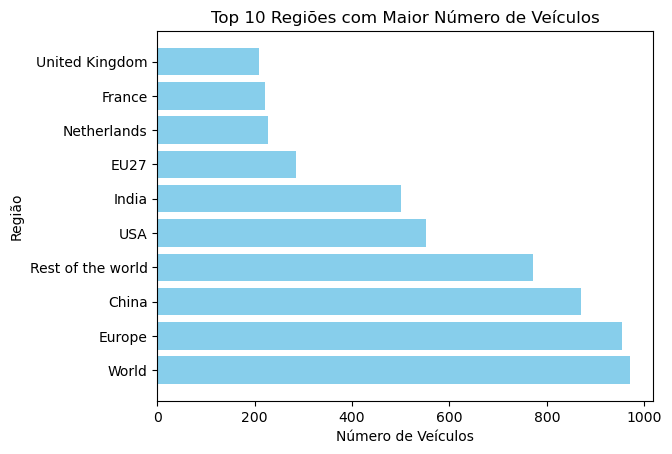

In [153]:
#gráfico de barras
plt.barh(top_10['Região'], top_10['Quantidade'], color='skyblue')
plt.xlabel('Número de Veículos')
plt.ylabel('Região')
plt.title('Top 10 Regiões com Maior Número de Veículos')
plt.show()